In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set()

In [2]:
data = pd.read_csv('data/zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
data.shape

(51717, 17)

Zomato is India's largest Food Delivery, Dining and Restaurant Discovery Service. This dataset contains information about different catering establishments across Bangalor. There are 17 features and 51717 observations in this dataset. Features such as 'url', 'address', 'phone', 'reviews_list' and 'menu_item' do not contain any useful information.

In [4]:
data.drop(columns = ['url', 'address', 'location', 'phone', 'reviews_list', 'menu_item', 'rest_type'], inplace = True)

In [5]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

'dish_liked' column contains more than a half NaN values, more than that, each catering establishment can have several best dishes, which makes it nearly impossible for high-quality data interpolation. This column should not be used in any ML algorithms, however we can get some interesting information from it, so we will leave it for the future.

In [6]:
data.rename(columns={'approx_cost(for two people)': 'approx_cost', 'listed_in(type)': 'type',
                     'listed_in(city)': 'location'}, inplace=True)

In [7]:
data.tail(3)

,name,online_order,book_table,rate,votes,dish_liked,cuisines,approx_cost,type,location
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4 /5,13,NaN,"Finger Food, North Indian, Continental","1,500",Pubs and bars,Whitefield


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   dish_liked    23639 non-null  object
 6   cuisines      51672 non-null  object
 7   approx_cost   51371 non-null  object
 8   type          51717 non-null  object
 9   location      51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


'rate', 'votes' and 'approx_cost' are supposed to have numeric data type, however right now 'rate' and 'approx_cost' columns have object dtype. To change the data type of the 'approx_cost' column we simply have to remove ',' since it is only a digit group separator.

In [9]:
data.loc[data['approx_cost'].notna() == True, 'approx_cost'] = \
pd.to_numeric(data['approx_cost'].dropna().apply(lambda x: x.replace(',', '')), downcast = 'integer')

To change the data type of the 'rate' column, we first need to determine if all the grades are on a five-point scale. If so we will just remove '/5' from every string and change the data type of the remnants.

In [10]:
scale = data['rate'].dropna().apply(lambda x: x.split('/')[-1])
scale.value_counts()

5      41665
NEW     2208
-         69
Name: rate, dtype: int64

Although all grades are on a five-point scale, some establishments are new and do not have any grades yet. We will change the values for such observations to NaN values.

In [11]:
data['rate'].replace(['NEW', '-'], np.NaN, inplace = True)

In [12]:
data.loc[data['rate'].notna() == True, 'rate'] = data['rate'].dropna().apply(lambda x: float(x.split('/')[0]))

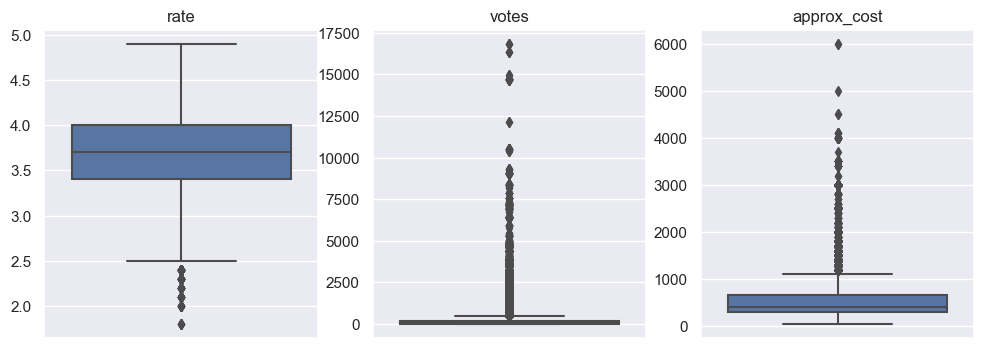

In [13]:
cols = ['rate', 'votes', 'approx_cost']
rows = 1
columns = 3
k=0
fig, axes = plt.subplots(rows, columns, figsize=(12, 4))
for j in range(columns):
    sns.boxplot(ax = axes[j], data = data[cols[k]])
    axes[j].set_xticks([])
    axes[j].set_title(cols[k])
    k+=1

<AxesSubplot: xlabel='online_order', ylabel='Count'>

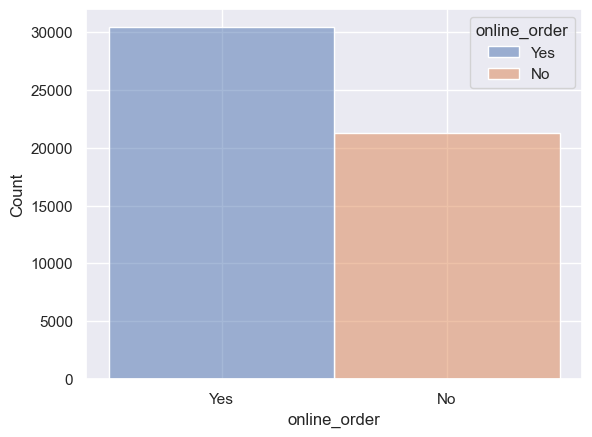

In [14]:
sns.histplot(data = data, x = 'online_order', hue = 'online_order')

<AxesSubplot: xlabel='book_table', ylabel='Count'>

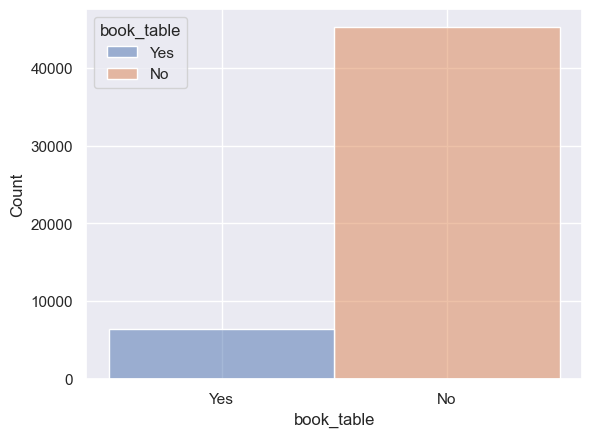

In [15]:
sns.histplot(data = data, x = 'book_table', hue = 'book_table')

<BarContainer object of 30 artists>

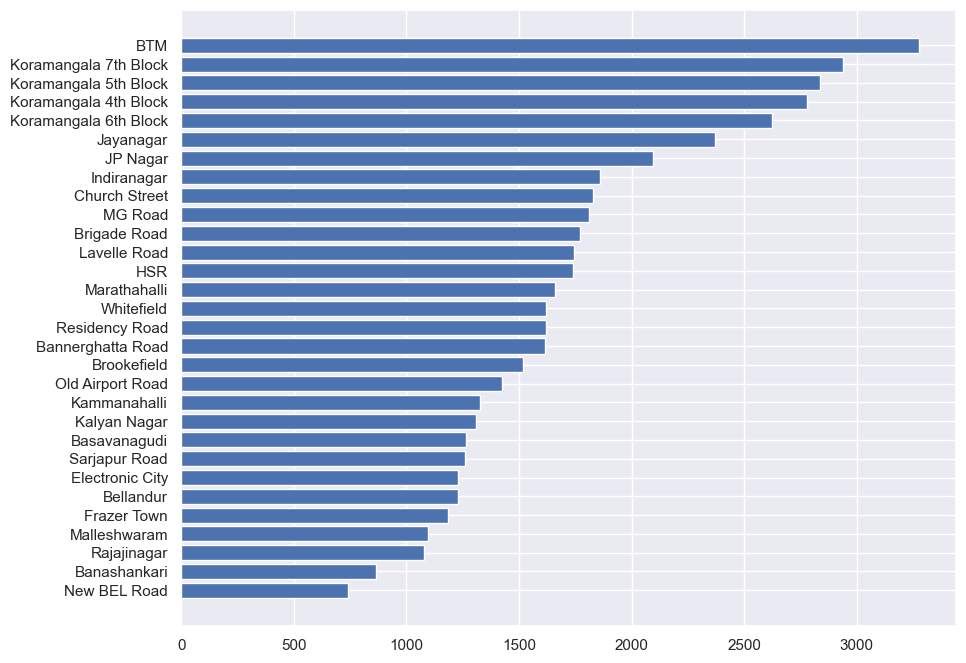

In [16]:
loc_count = data.groupby('location').count().sort_values('name')

plt.figure(figsize=(10,8))
plt.barh(loc_count.index, loc_count['name'])

The largest number of catering establishments is located in BTM. The smallest number - in New BEL Road.

<BarContainer object of 30 artists>

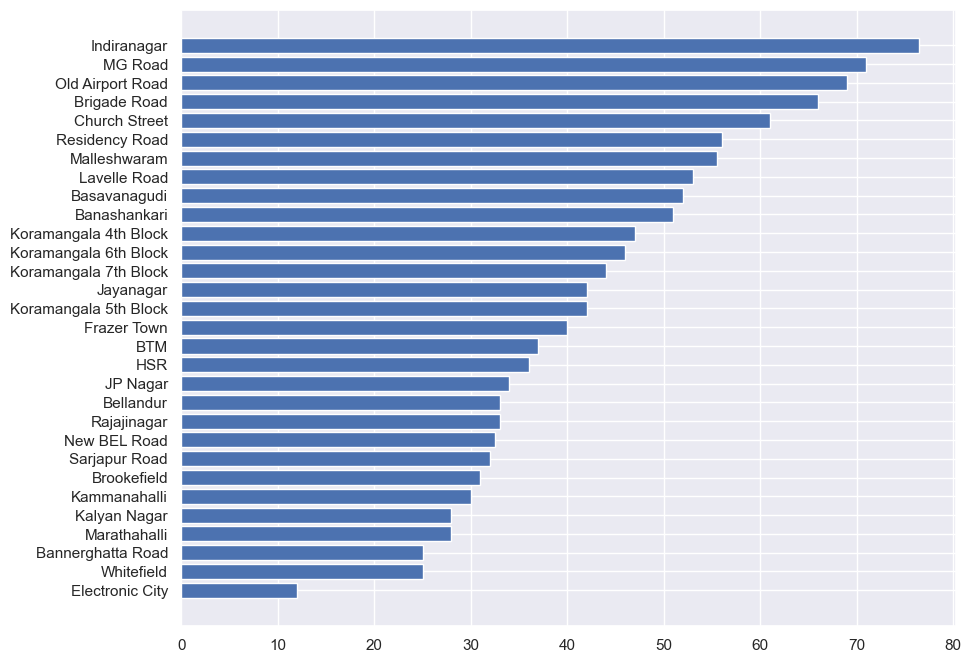

In [17]:
loc_votes = pd.DataFrame(data.groupby('location')['votes'].median())
loc_votes.sort_values('votes', inplace = True)

plt.figure(figsize=(10,8))
plt.barh(loc_votes.index, loc_votes['votes'])

Based on the average number of votes for the establishment, the most popular location to order food is Indiranagar. The least popular - Electronic City.

<BarContainer object of 30 artists>

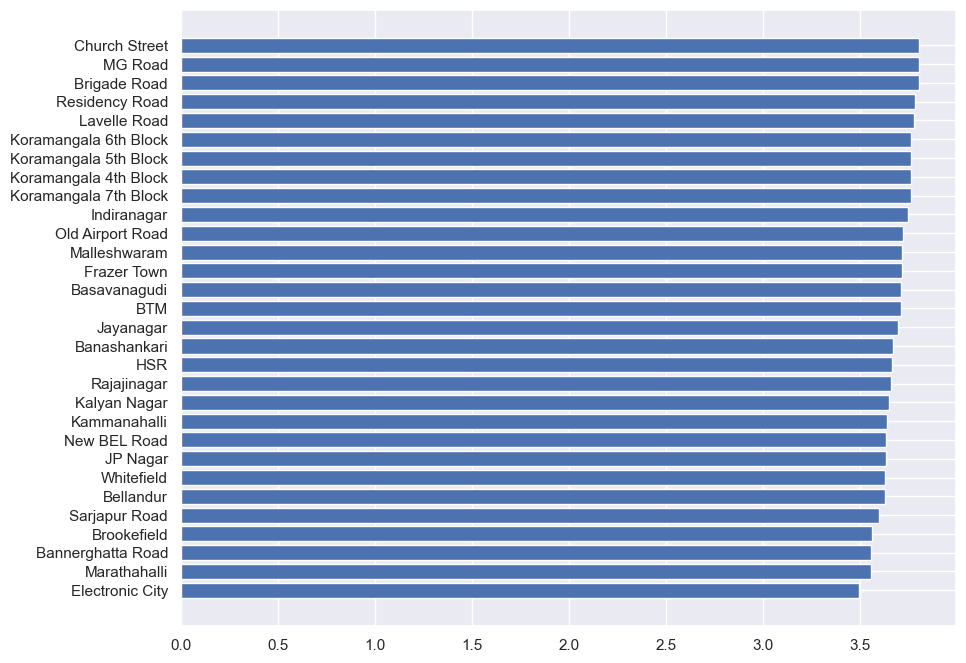

In [18]:
loc_votes = pd.DataFrame(data.groupby('location')['rate'].mean())
loc_votes.sort_values('rate', inplace = True)

plt.figure(figsize=(10,8))
plt.barh(loc_votes.index, loc_votes['rate'])

'Church Street' has the highest ratings for establishments.

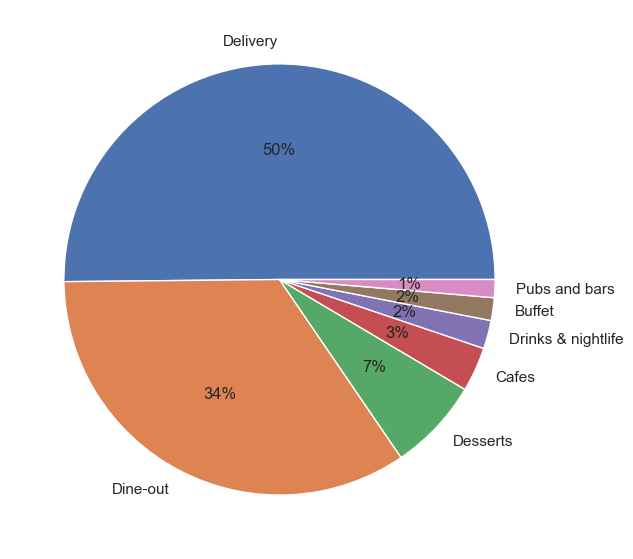

In [19]:
type_count = data['type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(type_count, labels = type_count.index, autopct='%.0f%%')
plt.show()

As can be seen from the chart above, half of the Bangalor's catering establishments only deliver food. A little over 1/3 have 'Dine-Out' type. The remaining types are represented by only 16% of the total number of establishments.

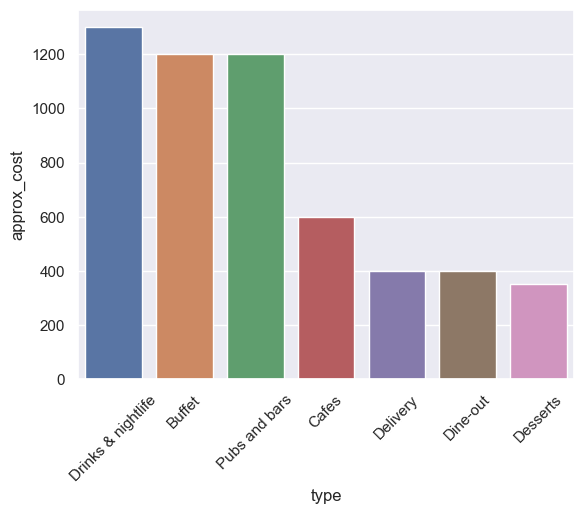

In [20]:
type_cost = pd.DataFrame(data.groupby('type')['approx_cost'].median())
type_cost.sort_values('approx_cost', ascending=False, inplace = True)
sns.barplot(y = type_cost['approx_cost'], x = type_cost.index)
plt.xticks(rotation = 45)
plt.show()

The most expensive types of establishments - 'Drinks & nightlife', 'Buffet' and 'Pubs and bars'. The least expensive - 'Desserts'.

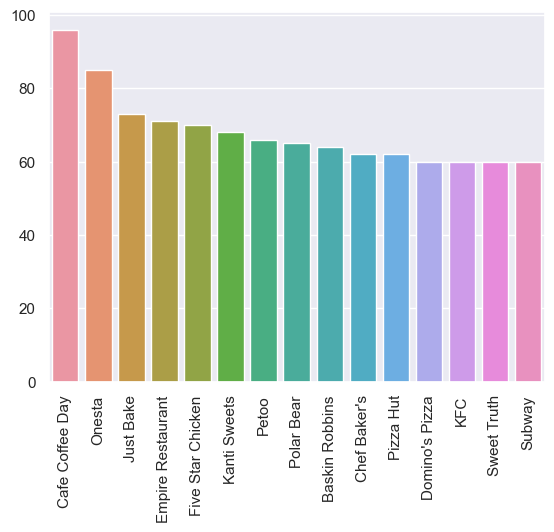

In [21]:
name_count = data['name'].value_counts()[:15]
sns.barplot(y = name_count.values, x = name_count.index)
plt.xticks(rotation = 90)
plt.show()

'Cafe Coffee Day' has the largest number of establishments in Bangalore.

## Top 50 dish liked

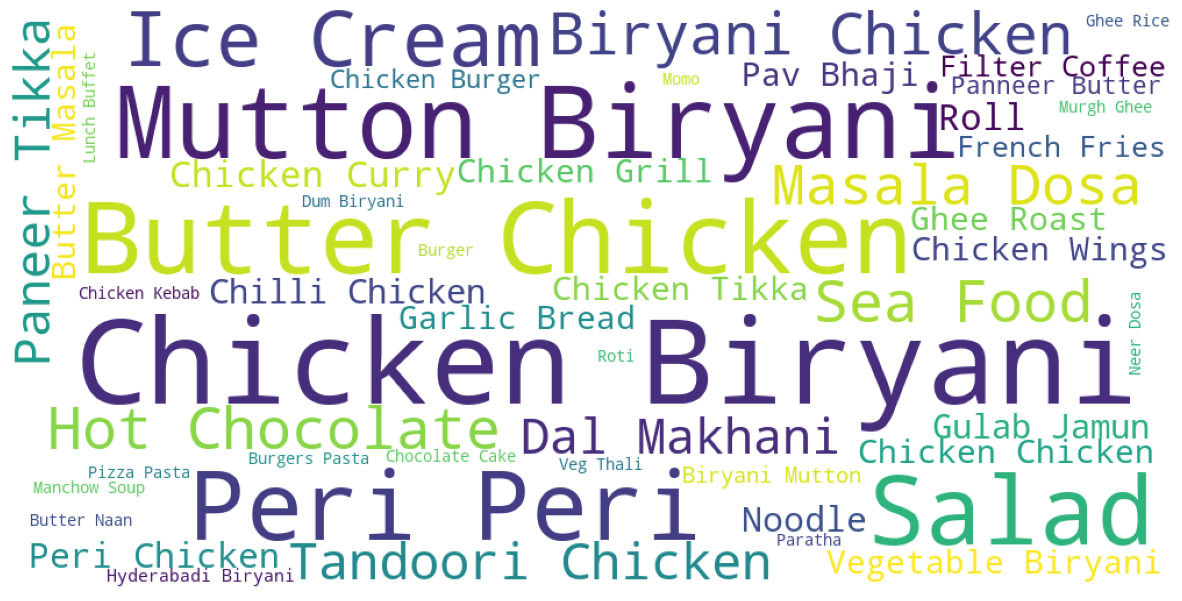

In [22]:
dish_liked = data['dish_liked'].dropna()
unique_string=(' ').join(dish_liked)

wordcloud = WordCloud(width = 1000, height = 500, background_color='white',max_words=50).generate(unique_string)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

The most liked dish across Bangalore is Chicken Biryani.

## Cuisines

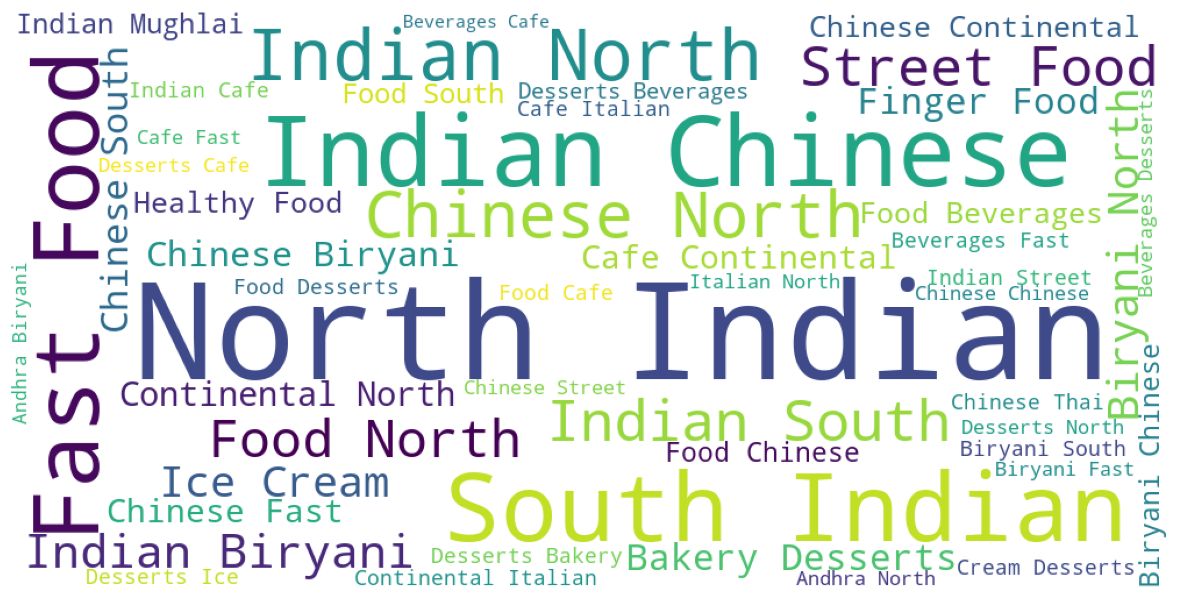

In [23]:
cuisines = data['cuisines'].dropna()
unique_string=(' ').join(cuisines)

wordcloud = WordCloud(width = 1000, height = 500, background_color='white',max_words=50).generate(unique_string)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

The most common cuisine is North Indian.